In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def softMax(feature_matrix):
    exp_matrix = np.exp(feature_matrix)
    denominator = exp_matrix.sum(axis=0)
    return exp_matrix / denominator

In [3]:
def reLU(x):
    return np.maximum(0 , x)

In [ ]:
class NeuralNetwork:
    def __init__(self, hidden_layers_dimensions, outputs, inputs):
        self.input_layer_dimension = inputs.shape[0]
        self.hidden_layers_dimensions = hidden_layers_dimensions
        self.output_layer_dimension = outputs.shape[0]

        self.input_layer = np.array(inputs)
        self.output = np.array(outputs)

        self.weights = []
        self.biases = []

        # Input to first hidden layer
        self.weights.append(np.random.randn(self.hidden_layers_dimensions[0], self.input_layer_dimension) * 0.1)
        self.biases.append(np.zeros((self.hidden_layers_dimensions[0], 1)))

        # Hidden layers
        for i in range(1, len(self.hidden_layers_dimensions)):
            self.weights.append(np.random.randn(self.hidden_layers_dimensions[i], self.hidden_layers_dimensions[i - 1]) * np.sqrt(1 / self.hidden_layers_dimensions[i - 1]))
            self.biases.append(np.zeros((self.hidden_layers_dimensions[i], 1)))

        # Last hidden layer to output
        self.weights.append(np.random.randn(self.output_layer_dimension, self.hidden_layers_dimensions[-1]) * np.sqrt(1 / self.hidden_layers_dimensions[-1]))
        self.biases.append(np.zeros((self.output_layer_dimension, 1)))

    def forward_propagation(self):
        activations = [self.input_layer]
        A = self.input_layer

        for i in range(len(self.hidden_layers_dimensions)):
            Z = np.dot(self.weights[i], A) + self.biases[i]
            A = np.tanh(Z)
            activations.append(A)

        # Output layer - No sigmoid for regression
        Z_output = np.dot(self.weights[-1], A) + self.biases[-1]
        activations.append(Z_output)

        return Z_output, activations

    def back_propagation(self, learning_rate=0.01):
        output, activations = self.forward_propagation()

        # Initialize gradients
        d_weights = [np.zeros_like(w) for w in self.weights]
        d_biases = [np.zeros_like(b) for b in self.biases]

        # Compute output layer error
        error = output - self.output
        dZ = error  

        # Backpropagation through output layer
        d_weights[-1] = np.dot(dZ, activations[-2].T)
        d_biases[-1] = np.sum(dZ, axis=1, keepdims=True)

        # Backpropagation through hidden layers
        for i in range(len(self.hidden_layers_dimensions) - 1, -1, -1):
            dA = np.dot(self.weights[i + 1].T, dZ)
            dZ = dA * (1 - activations[i + 1] ** 2)  # Derivative of tanh activation
            d_weights[i] = np.dot(dZ, activations[i].T)
            d_biases[i] = np.sum(dZ, axis=1, keepdims=True)

        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * d_weights[i]
            self.biases[i] -= learning_rate * d_biases[i]


In [74]:
class NeuralNetworkswithoutTensor:
    def __init__(self, hidden_layers_dimensions, outputs, inputs):
        self.input_layer_dimension = inputs.shape[0]
        self.hidden_layers_dimensions = hidden_layers_dimensions
        self.output_layer_dimension = outputs.shape[0]
        self.input_layer = np.array(inputs, dtype=np.float32)
        self.output = np.array(outputs, dtype=np.float32)

        self.weights = []
        self.biases = []

        # Input to first hidden layer
        self.weights.append(np.random.randn(self.hidden_layers_dimensions[0], self.input_layer_dimension) * 0.1)
        self.biases.append(np.zeros((self.hidden_layers_dimensions[0], 1), dtype=np.float32))

        # Hidden layers
        for i in range(1, len(self.hidden_layers_dimensions)):
            self.weights.append(np.random.randn(self.hidden_layers_dimensions[i], self.hidden_layers_dimensions[i - 1]) * np.sqrt(1.0 / self.hidden_layers_dimensions[i - 1]))
            self.biases.append(np.zeros((self.hidden_layers_dimensions[i], 1), dtype=np.float32))

        # Last hidden layer to output (10 neurons for 10 classes)
        self.weights.append(np.random.randn(self.output_layer_dimension, self.hidden_layers_dimensions[-1]) * np.sqrt(1.0 / self.hidden_layers_dimensions[-1]))
        self.biases.append(np.zeros((self.output_layer_dimension, 1), dtype=np.float32))

    def forward_propagation(self, input_data):
        activations = [input_data]  
        A = input_data

        for i in range(len(self.hidden_layers_dimensions)):
            Z = np.dot(self.weights[i], A) + self.biases[i]
            A = np.maximum(0, Z)  # ReLU Activation
            activations.append(A)

        # Output layer (Softmax for multi-class classification)
        Z_output = np.dot(self.weights[-1], A) + self.biases[-1]
        expZ = np.exp(Z_output - np.max(Z_output, axis=0, keepdims=True))  # Stabilized softmax
        A_output = expZ / np.sum(expZ, axis=0, keepdims=True)  
        activations.append(A_output)

        return A_output, activations

    def back_propagation(self, learning_rate=0.01):
        output, activations = self.forward_propagation(self.input_layer)
        
        # Compute cross-entropy loss derivative
        dZ = output - self.output  

        # Initialize gradients
        d_weights = [np.zeros_like(w) for w in self.weights]
        d_biases = [np.zeros_like(b) for b in self.biases]

        # Backpropagation through output layer
        d_weights[-1] = np.dot(dZ, activations[-2].T)
        d_biases[-1] = np.sum(dZ, axis=1, keepdims=True)

        # Backpropagation through hidden layers
        for i in range(len(self.hidden_layers_dimensions) - 1, -1, -1):
            dA = np.dot(self.weights[i + 1].T, dZ)
            dZ = dA * (activations[i + 1] > 0)  # Derivative of ReLU
            d_weights[i] = np.dot(dZ, activations[i].T)
            d_biases[i] = np.sum(dZ, axis=1, keepdims=True)

        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * d_weights[i]
            self.biases[i] -= learning_rate * d_biases[i]

        # Compute loss (Cross-Entropy)
        loss = -np.mean(self.output * np.log(output + 1e-8))  # Avoid log(0)
        return loss

    def predict(self, inputs):
        inputs = np.array(inputs, dtype=np.float32)  # Ensure NumPy array
        outputs, _ = self.forward_propagation(inputs)
        predictions = np.argmax(outputs, axis=0)  # Get the class with highest probability
        return predictions , outputs

In [3]:

class NeuralNetworks:
    def __init__(self, hidden_layers_dimensions, outputs, inputs):
        self.input_layer_dimension = inputs.shape[0]
        self.hidden_layers_dimensions = hidden_layers_dimensions
        self.output_layer_dimension = outputs.shape[0]
        self.input_layer = tf.convert_to_tensor(inputs, dtype=tf.float32)
        self.output = tf.convert_to_tensor(outputs, dtype=tf.float32)

        self.weights = []
        self.biases = []

        # Input to first hidden layer
        self.weights.append(tf.Variable(tf.random.normal([self.hidden_layers_dimensions[0], self.input_layer_dimension], stddev=0.1, dtype=tf.float32)))
        self.biases.append(tf.Variable(tf.zeros([self.hidden_layers_dimensions[0], 1], dtype=tf.float32)))

        # Hidden layers
        for i in range(1, len(self.hidden_layers_dimensions)):
            self.weights.append(tf.Variable(tf.random.normal([self.hidden_layers_dimensions[i], self.hidden_layers_dimensions[i - 1]], stddev=tf.sqrt(1.0 / self.hidden_layers_dimensions[i - 1]), dtype=tf.float32)))
            self.biases.append(tf.Variable(tf.zeros([self.hidden_layers_dimensions[i], 1], dtype=tf.float32)))

        # Last hidden layer to output (10 neurons for 10 classes)
        self.weights.append(tf.Variable(tf.random.normal([self.output_layer_dimension, self.hidden_layers_dimensions[-1]], stddev=tf.sqrt(1.0 / self.hidden_layers_dimensions[-1]), dtype=tf.float32)))
        self.biases.append(tf.Variable(tf.zeros([self.output_layer_dimension, 1], dtype=tf.float32)))

    def forward_propagation(self, input_data):
        activations = [input_data]  
        A = input_data

        for i in range(len(self.hidden_layers_dimensions)):
            Z = tf.matmul(self.weights[i], A) + self.biases[i]
            A = tf.nn.relu(Z)  # Using ReLU for hidden layers
            activations.append(A)

        # Output layer (Softmax for multi-class classification)
        Z_output = tf.matmul(self.weights[-1], A) + self.biases[-1]
        A_output = tf.nn.softmax(Z_output, axis=0)  # Apply softmax activation
        activations.append(A_output)

        return A_output, activations

    def back_propagation(self, learning_rate=0.01):
        with tf.GradientTape() as tape:
            output, activations = self.forward_propagation(self.input_layer)
            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=self.output))  # Cross-entropy loss

        # Compute gradients
        gradients = tape.gradient(loss, self.weights + self.biases)

        # Update weights and biases using Adam optimizer
        optimizer = tf.optimizers.Adam(learning_rate)
        optimizer.apply_gradients(zip(gradients, self.weights + self.biases))

        return loss.numpy()
    
    def predict(self, inputs):
        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)  # Ensure tensor format
        outputs, _ = self.forward_propagation(inputs)  
        predictions = tf.argmax(outputs, axis=0)  # Get the class with highest probability
        return predictions.numpy() , outputs # Convert tensor to NumPy array for readability

In [ ]:
from tensorflow.keras.datasets import mnist

# Load MNIST Dataset
(train_inputs, train_outputs), (test_inputs, test_outputs) = mnist.load_data()

# Flatten images from (28,28) to (784,) and normalize
train_inputs = train_inputs.reshape(60000, 784).T / 255.0  # Shape: (784, 60000)
test_inputs = test_inputs.reshape(10000, 784).T / 255.0    # Shape: (784, 10000)

# Convert labels to one-hot encoding (10 classes)
train_outputs = np.eye(10)[train_outputs].T  # Shape: (10, 60000)
test_outputs = np.eye(10)[test_outputs].T    # Shape: (10, 10000)

# Convert to TensorFlow tensors
train_inputs = tf.convert_to_tensor(train_inputs, dtype=tf.float32)
train_outputs = tf.convert_to_tensor(train_outputs, dtype=tf.float32)

In [7]:
# Initialize Model
hidden_layer_dimensions = [128, 64]  # Two hidden layers with 128 and 64 neurons
brain_one = NeuralNetworks(hidden_layer_dimensions, train_outputs, train_inputs)

# Train the Model
epochs = 500
for epoch in range(epochs):
    loss = brain_one.back_propagation(learning_rate=0.01)
    if epoch % 1 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss}")



Epoch 1, Loss: 65982.640625
Epoch 2, Loss: 65052.7890625
Epoch 3, Loss: 64162.9140625
Epoch 4, Loss: 64197.5234375
Epoch 5, Loss: 64254.0
Epoch 6, Loss: 65270.9296875
Epoch 7, Loss: 65172.30078125
Epoch 8, Loss: 64361.75
Epoch 9, Loss: 64148.625
Epoch 10, Loss: 64404.38671875
Epoch 11, Loss: 63645.73828125
Epoch 12, Loss: 63819.4296875
Epoch 13, Loss: 64073.76171875
Epoch 14, Loss: 63349.01171875
Epoch 15, Loss: 64015.3203125
Epoch 16, Loss: 63201.54296875
Epoch 17, Loss: 63580.1015625
Epoch 18, Loss: 63738.94921875
Epoch 19, Loss: 63097.05078125
Epoch 20, Loss: 63415.5234375
Epoch 21, Loss: 63359.23828125
Epoch 22, Loss: 63208.63671875
Epoch 23, Loss: 63202.4609375
Epoch 24, Loss: 62968.01171875
Epoch 25, Loss: 63534.63671875
Epoch 26, Loss: 62896.36328125
Epoch 27, Loss: 63280.88671875
Epoch 28, Loss: 62892.875
Epoch 29, Loss: 63137.75
Epoch 30, Loss: 62850.07421875
Epoch 31, Loss: 63062.30078125
Epoch 32, Loss: 62823.73046875
Epoch 33, Loss: 62935.11328125
Epoch 34, Loss: 62788.6367

In [8]:
from tensorflow.keras.datasets import mnist

# Load MNIST Dataset
(train_inputs, train_outputs), (test_inputs, test_outputs) = mnist.load_data()

# Flatten images from (28,28) to (784,) and normalize
train_inputs = train_inputs.reshape(60000, 784).T / 255.0  # Shape: (784, 60000)
test_inputs = test_inputs.reshape(10000, 784).T / 255.0    # Shape: (784, 10000)

# Convert labels to one-hot encoding (10 classes)
train_outputs = np.eye(10)[train_outputs].T  # Shape: (10, 60000)
test_outputs = np.eye(10)[test_outputs].T    # Shape: (10, 10000)

# Initialize Model
hidden_layer_dimensions = [128, 64]
brain_one = NeuralNetworkswithoutTensor(hidden_layer_dimensions, train_outputs, train_inputs)

# Train the Model
epochs = 10
for epoch in range(epochs):
    loss = brain_one.back_propagation(learning_rate=0.01)
    print(f"Epoch {epoch+1}, Loss: {loss}")

# Make Predictions
A_output = brain_one.predict(test_inputs[:, 100].reshape(-1, 1))
print("Predicted Digit:", A_output)

NameError: name 'NeuralNetworkswithoutTensor' is not defined

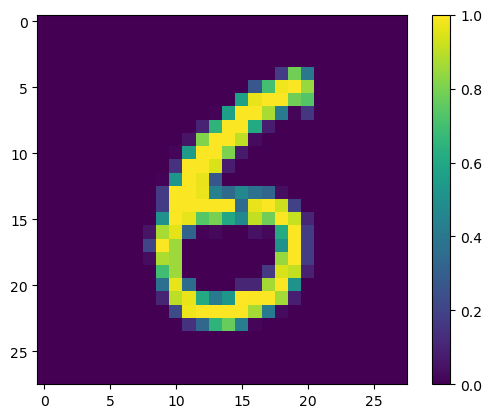

In [ ]:
number = 457
plt.figure()
plt.imshow(test_inputs[:, number].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
A_output , outputs = brain_one.predict(test_inputs[:, number].reshape(-1, 1))
print(A_output , outputs)

[6] tf.Tensor(
[[1.7879098e-37]
 [0.0000000e+00]
 [9.5889400e-34]
 [2.9762484e-38]
 [0.0000000e+00]
 [3.8614474e-18]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]], shape=(10, 1), dtype=float32)


In [12]:
import cv2

In [67]:
import cv2
import numpy as np

def preprocess_page(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur to remove noise
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Adaptive Thresholding to detect digits clearly
    img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    return img_thresh

def extract_and_segment_digits(image):
    # Find contours (digit outlines)
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    digit_images = []
    bounding_boxes = []

    for contour in contours:
        # Get bounding box for each detected digit
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))

    # Sort bounding boxes from left to right (important for multi-digit numbers)
    bounding_boxes = sorted(bounding_boxes, key=lambda b: b[0])

    for x, y, w, h in bounding_boxes:
        # Extract the digit
        digit = image[y:y+h, x:x+w]


        padding = 10

        # Make the digit square by adding padding
        size = max(w, h)  # Get the max dimension
        pad_x = (size - w) // 1 + padding # Padding for width
        pad_y = (size - h) // 1 + padding # Padding for height

        digit_padded = cv2.copyMakeBorder(digit, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_CONSTANT, value=0)

        # Resize to 28x28 pixels
        digit_resized = cv2.resize(digit_padded, (28, 28))

        # Normalize and reshape for model input
        digit_resized = digit_resized / 255.0
        digit_resized = digit_resized.reshape(784, 1)  # Convert to (784,1) shape for neural network

        digit_images.append(digit_resized)

    return digit_images

# Load and preprocess the page image
image_path = "/Users/sriramkurnella/AI/My_Work/Numbers.png"  # Replace with your image path
preprocessed_image = preprocess_page(image_path)

# Extract and segment digits
digit_images = extract_and_segment_digits(preprocessed_image)

# Predict each digit using trained model
predicted_digits = [brain_one.predict(digit) for digit in digit_images]

print("Recognized Digits:", predicted_digits)

Recognized Digits: [array([1]), array([5]), array([7]), array([1]), array([2]), array([3]), array([6]), array([1]), array([0])]


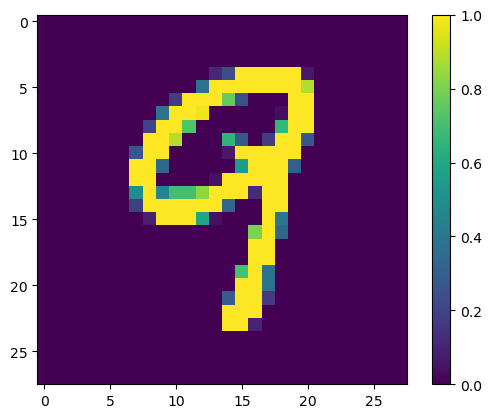

In [70]:

plt.figure()
plt.imshow(digit_images[2].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

In [73]:
A_output = brain_one.predict(digit_images[2].reshape(-1, 1))
print(A_output)

[7]


In [ ]:
A_output_pred = 0
for i in range(1000):
    if np.argmax(brain_one.predict(test_inputs[:, i].reshape(-1, 1))) == np.argmax(test_outputs[:, i]):
        A_output_pred += 1

print("Accuracy = ", (A_output_pred / 1000) * 100)


Accuracy =  8.5


In [ ]:
(np.bincount(A_output))

array([  940,  8806,  6400,   536, 25300, 10948,  4402,  2668])

In [ ]:
dataframe = pd.read_csv("/Users/sriramkurnella/AI/Machine Learning A-Z (Codes and Datasets)/train.csv")

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
train_inputs = np.array(dataframe.iloc[0:40000 , 1:])
train_output = np.array(dataframe.iloc[0:40000, 1]).reshape(1, -1)  # Shape (1, 40000)

In [ ]:
# Example Dataset
train_inputs = np.random.rand(784, 10000).astype('float32')  # Shape (features, samples)
train_outputs = np.random.rand(1, 10000).astype('float32')  # Shape (1, samples)

# Initialize Model
hidden_layer_dimensions = [40, 40]
brain_one = NeuralNetwork(hidden_layer_dimensions, train_outputs, train_inputs)

# Train the Model
epochs = 1500
for epoch in range(epochs):
    loss = brain_one.back_propagation(learning_rate=0.01)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Predict
predicted_output, _ = brain_one.forward_propagation()
print(predicted_output.numpy())

Epoch 0, Loss: 0.6562216877937317


KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.imshow(predicted_output.numpy().reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

ValueError: cannot reshape array of size 10000 into shape (28,28)

<Figure size 640x480 with 0 Axes>

In [ ]:
train_inputs = np.array(dataframe.iloc[0:40000, 1:]).T  # Shape (784, 40000)
train_outputs = np.array(dataframe.iloc[0:40000, 0]).reshape(1, -1)  # Shape (1, 40000)

# Normalize Output
train_output = (train_output - np.min(train_output)) / (np.max(train_output) - np.min(train_output))

# Initialize and Train
hidden_layer_dimensions = [40, 40]
brain_one = NeuralNetwork(hidden_layer_dimensions, train_output, train_inputs)

# Train the model with more iterations
for _ in range(1000):  # More iterations for stability
    brain_one.back_propagation(learning_rate=0.01)

# Predict
predicted_output, _ = brain_one.forward_propagation()

# Rescale Output
predicted_output = predicted_output * (np.max(train_output) - np.min(train_output)) + np.min(train_output)

print(predicted_output)

[[nan nan nan ... nan nan nan]]


In [ ]:
train_inputs

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available: 0


In [ ]:
dataframe.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
plt.figure()
plt.imshow(dataframe.iloc[20, 1:].values.reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

NameError: name 'dataframe' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
train_inputs = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
])

train_output = np.array([
    [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
])

# Normalize Output
train_output = (train_output - np.min(train_output)) / (np.max(train_output) - np.min(train_output))

# Initialize and Train
hidden_layer_dimensions = [16 , 16]
brain_one = NeuralNetwork(hidden_layer_dimensions, train_output, train_inputs)

# Train the model with more iterations
for _ in range(50000):  # More iterations for stability
    brain_one.back_propagation(learning_rate=0.01)

# Predict
predicted_output, _ = brain_one.forward_propagation()

# Rescale Output
predicted_output = predicted_output * (21 - 3) + 3  # Reverse normalization

print(predicted_output)

[[ 2.91707685  4.99443784  6.92111515  8.87502386 10.85411436 12.85789359
  14.88160912 16.90108584 18.87256106 20.7437251 ]]


In [ ]:
train_inputs = np.array([[2, 3], [3, 4]]).T
train_output = np.array([[4, 5]])
hidden_layer_dimensions = [16, 16]

In [ ]:
brain_one = NeuralNetwork(hidden_layer_dimensions, np.array(train_output), np.array(train_inputs))
        

In [ ]:
cal_ouputs , Activations = brain_one.forward_propagation()

Activations

[array([[2, 3],
        [3, 4]]),
 array([[ 0.9935049 ,  0.99923343],
        [ 0.98643462,  0.99822211],
        [-0.22385969, -0.20221265],
        [ 0.14474264,  0.5108657 ],
        [ 0.99996711,  0.99999957],
        [-0.92956045, -0.97888797],
        [ 0.99956256,  0.99998519],
        [-0.2631077 , -0.49650049],
        [-0.84680119, -0.91079968],
        [ 0.8788682 ,  0.97526838],
        [-0.99883515, -0.99989209],
        [ 0.04892827, -0.23563968],
        [-0.93697532, -0.98449775],
        [ 0.98288935,  0.99816361],
        [-0.97788286, -0.9973085 ],
        [-0.99999944, -1.        ]]),
 array([[-0.59531821, -0.6033032 ],
        [-0.77449219, -0.71213309],
        [-0.39040863, -0.54893732],
        [-0.04530551,  0.00945575],
        [ 0.83577996,  0.89541987],
        [ 0.76385389,  0.84842869],
        [-0.49773595, -0.65963343],
        [ 0.56162955,  0.64477405],
        [-0.88076161, -0.90856908],
        [-0.25821393, -0.35083679],
        [-0.60866045, -0.644

In [ ]:
cal_ouputs

array([[0.7600068 , 0.74269814]])

In [ ]:
786-i
128 + 15 - h
10 - o